In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import utils
import utils_plot
import model

2023-09-17 20:11:22.697 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-09-17 20:11:22.697 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-09-17 20:11:22.705 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-09-17 20:11:22.733 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-09-17 20:11:22.736 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-09-17 20:11:22.739 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
X_train, y_train, X_test, y_test, X_calib, y_calib = utils.get_data()

net = model.MLP1()

In [3]:
train_data = (X_train, y_train)

net = utils.train_model(net, train_data)

2023-09-17 20:11:23.887 
  command:

    streamlit run c:\Users\Lalit Chandra Routhu\anaconda3\envs\portfolio\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Epoch [1/1] Batch [100/930] Loss: 1.9685 Train Accuracy: 0.0000
Epoch [1/1] Batch [200/930] Loss: 1.3838 Train Accuracy: 0.0000
Epoch [1/1] Batch [300/930] Loss: 1.0192 Train Accuracy: 0.0000
Epoch [1/1] Batch [400/930] Loss: 0.7713 Train Accuracy: 0.0000
Epoch [1/1] Batch [500/930] Loss: 0.6418 Train Accuracy: 0.0000
Epoch [1/1] Batch [600/930] Loss: 0.5590 Train Accuracy: 0.0000
Epoch [1/1] Batch [700/930] Loss: 0.4996 Train Accuracy: 0.0000
Epoch [1/1] Batch [800/930] Loss: 0.4348 Train Accuracy: 0.0000
Epoch [1/1] Batch [900/930] Loss: 0.4032 Train Accuracy: 0.0000


In [4]:
# idxs where model is not sure: temp2.txt
# idxs where model is sure: 0, 1, 2, 3

In [5]:
n = len(X_calib)
scores = utils.get_scores(net, (X_calib, y_calib))

alpha = 0.05

q_val = np.ceil((1 - alpha) * (n + 1)) / n

q = np.quantile(scores, q_val, method="higher")
# utils_plot.histogram_plot(scores, q, alpha)

pred_sets = utils.get_pred_sets(net, (X_test, y_test), q, alpha)

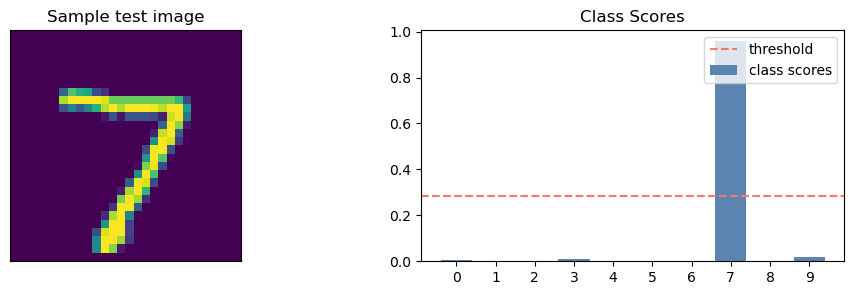

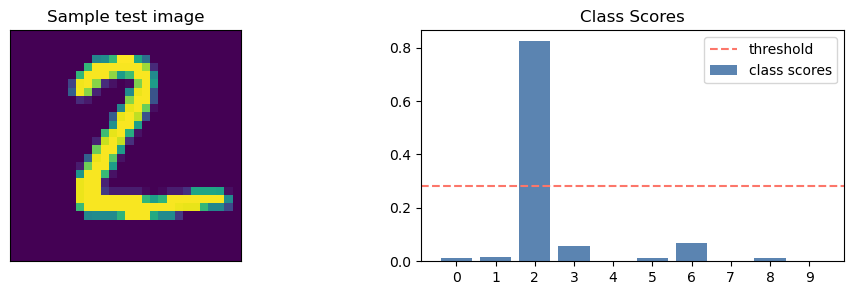

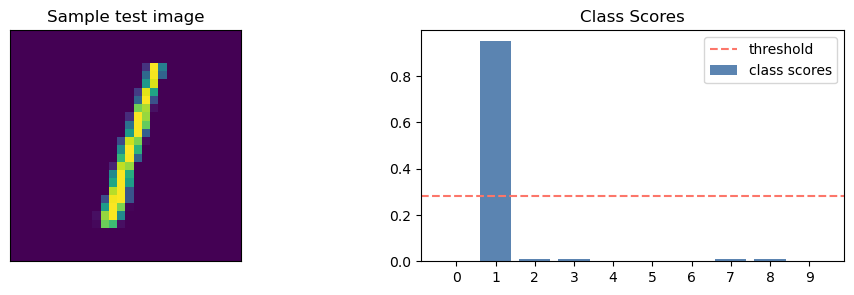

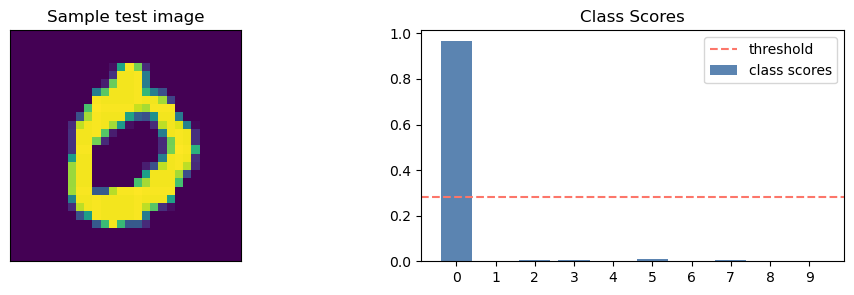

In [6]:
#Sure predictions
for test_img_idx in range(4):
    # fig, ax, pred, pred_str = utils.get_test_preds_and_smx(X_test, idxs[test_img_idx], pred_sets, net, q, alpha)
    fig, ax, pred, pred_str = utils.get_test_preds_and_smx(X_test, test_img_idx, pred_sets, net, q, alpha)
    # print(pred_sets)
    plt.show(fig)

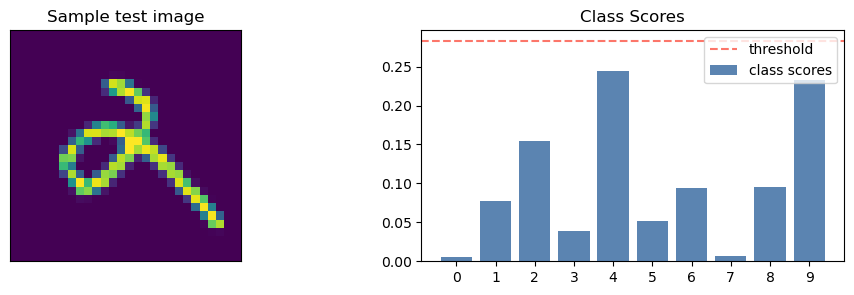

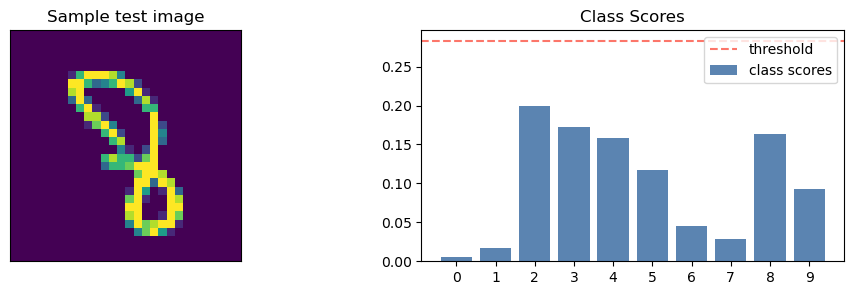

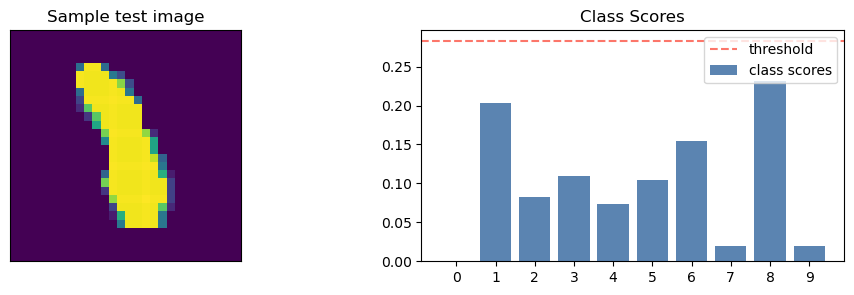

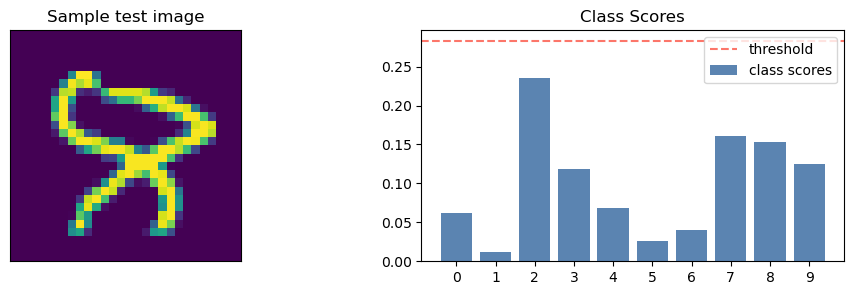

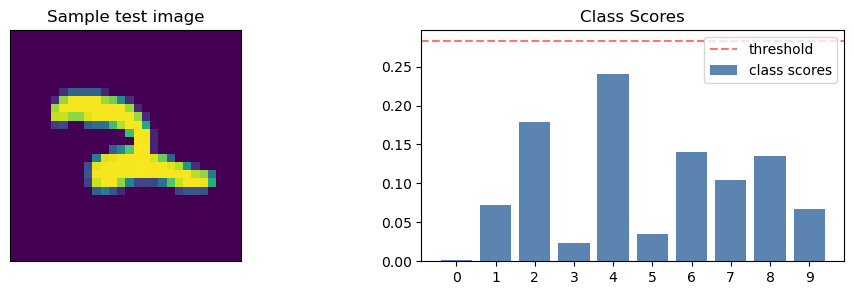

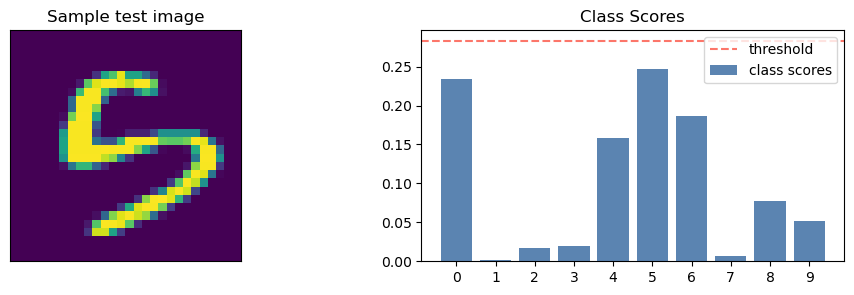

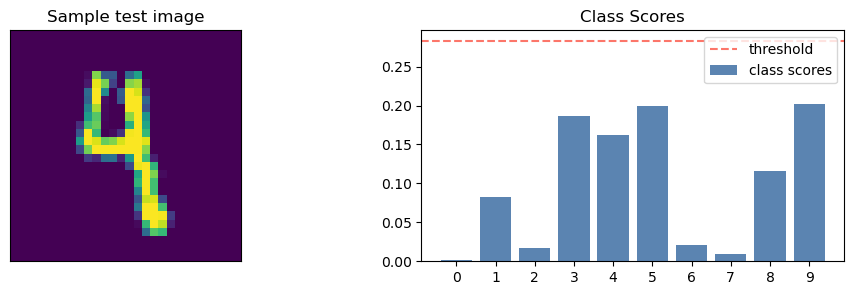

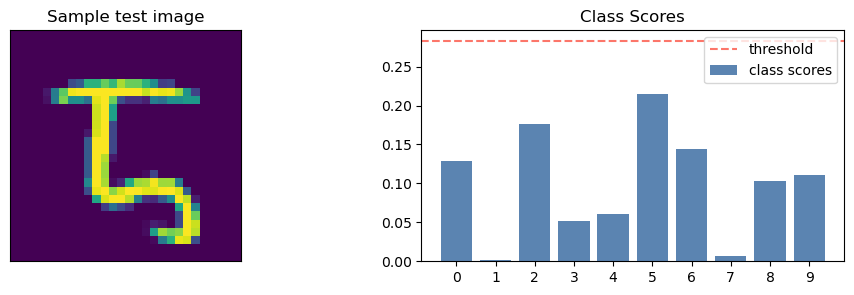

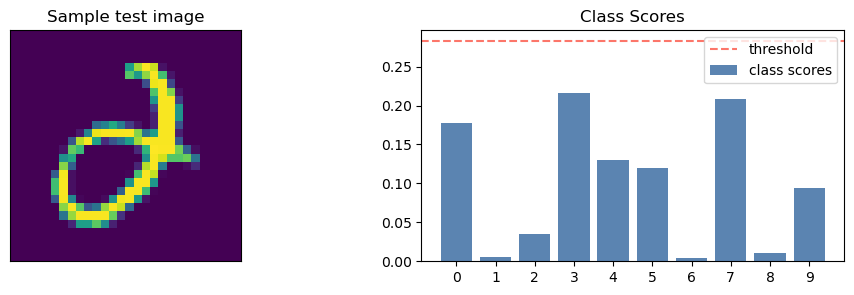

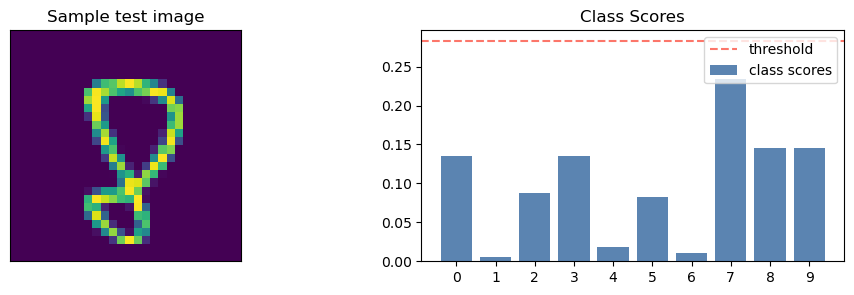

In [7]:
# Unsure predictions
idx = [149, 543, 619, 1782, 2635, 2668, 3490, 3778, 3811, 3951]

for test_img_idx in idx:
    # fig, ax, pred, pred_str = utils.get_test_preds_and_smx(X_test, idxs[test_img_idx], pred_sets, net, q, alpha)
    fig, ax, pred, pred_str = utils.get_test_preds_and_smx(X_test, test_img_idx, pred_sets, net, q, alpha)
    # print(pred_sets)
    plt.show(fig)

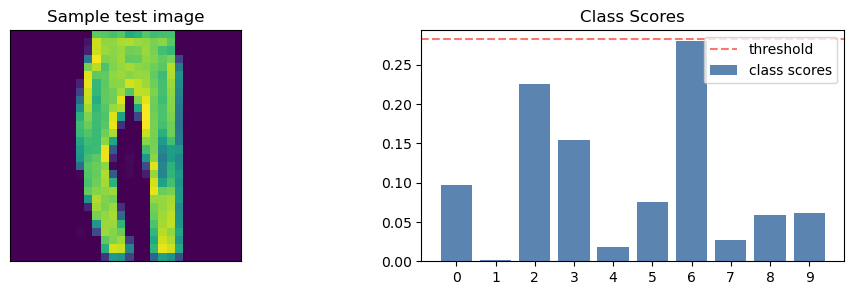

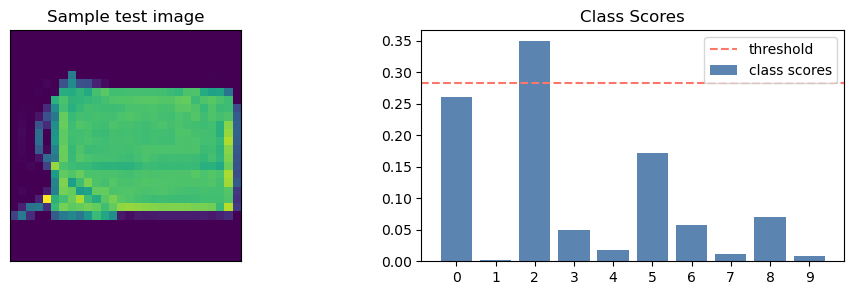

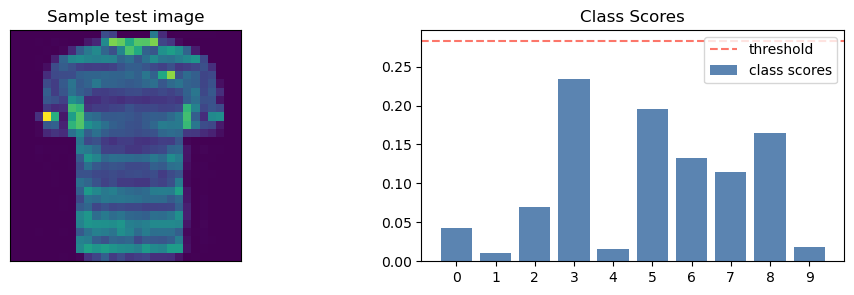

In [8]:
# Fashion MNIST
fashion_mnist_data = utils.fashion_mnist()
fashion_idx = [5, 18, 35]

for test_img_idx in fashion_idx:
    fig, ax, pred, pred_str = utils.get_test_preds_and_smx(fashion_mnist_data, test_img_idx, pred_sets, net, q, alpha)
    # print(pred_sets)
    plt.show(fig)